In [1]:
MODEL_NAME = 'ResNet'

In [2]:
import numpy as np
import csv
# from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from model import Network, SimpleNET, ResNet

if MODEL_NAME == 'ResNet':
    from config.ResNet_config import *
else:
    from config.baseline_config import *
    
from augmentation import transforms_0
from train import train

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
trainset = datasets.ImageFolder('/dtu/datasets1/02514/hotdog_nothotdog/train', transform=transforms_0)
train_loader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=1)

testset = datasets.ImageFolder('/dtu/datasets1/02514/hotdog_nothotdog/test', transform=transforms_0)
test_loader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=1)

In [6]:
if MODEL_NAME == 'ResNet':
    model = eval(MODEL_NAME)(n_features=CONV_SIZE, num_res_blocks=NUM_BLOCKS)
else:
    model = eval(MODEL_NAME)()
    
model.to(device)
loss = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE) # , weight_decay=WEIGHT_DECAY)
lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=DECAY_RATE)

In [7]:
out_dict_adam = train(model, train_loader, test_loader, loss, optimizer, NUM_EPOCHS)

  0%|          | 0/20 [00:00<?, ?epoch/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.704	 test: 0.689	 Accuracy train: 51.2%	 test: 59.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.695	 test: 0.702	 Accuracy train: 51.7%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.689	 test: 0.707	 Accuracy train: 53.8%	 test: 48.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.665	 test: 0.651	 Accuracy train: 60.7%	 test: 66.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.641	 test: 0.635	 Accuracy train: 66.8%	 test: 67.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.627	 test: 0.605	 Accuracy train: 66.8%	 test: 70.3%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.607	 test: 0.614	 Accuracy train: 69.3%	 test: 70.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.598	 test: 0.742	 Accuracy train: 69.9%	 test: 70.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.581	 test: 0.612	 Accuracy train: 71.3%	 test: 69.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.601	 test: 0.581	 Accuracy train: 69.8%	 test: 70.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.595	 test: 0.606	 Accuracy train: 70.2%	 test: 71.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.582	 test: 0.566	 Accuracy train: 70.0%	 test: 71.3%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.569	 test: 0.612	 Accuracy train: 72.2%	 test: 68.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.540	 test: 0.637	 Accuracy train: 74.6%	 test: 64.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.557	 test: 0.557	 Accuracy train: 73.2%	 test: 71.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.524	 test: 0.551	 Accuracy train: 75.7%	 test: 72.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.508	 test: 0.556	 Accuracy train: 75.6%	 test: 72.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.484	 test: 0.586	 Accuracy train: 78.3%	 test: 69.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.457	 test: 0.582	 Accuracy train: 80.0%	 test: 69.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.464	 test: 0.559	 Accuracy train: 79.2%	 test: 72.6%


In [9]:
# saving results
optim = 'Adam'
d = out_dict_adam
if MODEL_NAME == 'ResNet':
    filename = f'results/{MODEL_NAME}/{CONV_SIZE}_kernel_{NUM_BLOCKS}_blocks_{NUM_EPOCHS}_epochs_{LEARNING_RATE:.0e}_lr_{optim}_optim.csv'
else:
    filename = f'results/{MODEL_NAME}/{NUM_EPOCHS}_epochs_{LEARNING_RATE:.0e}_lr_{optim}_optim.csv'
with open(filename, 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(d.keys())
    writer.writerows(zip(*d.values()))

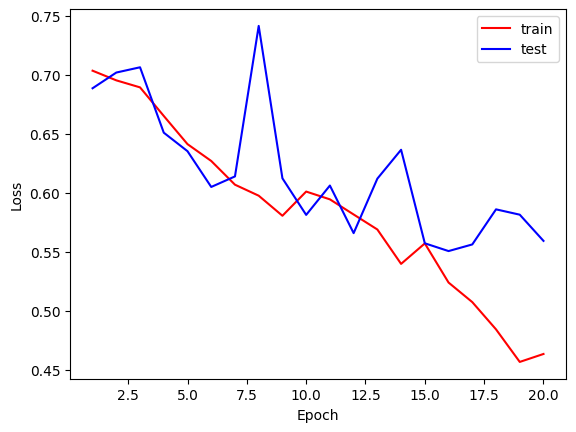

In [8]:
plt.plot([e for e in range(1, NUM_EPOCHS+1)], out_dict_adam['train_loss'], c='r', label='train')
plt.plot([e for e in range(1, NUM_EPOCHS+1)], out_dict_adam['test_loss'], c='b', label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()